# Analiza danych tekstowych, porównanie technik obróbki tekstu w kontekście klasyfikacji

Wykonanie analizy oraz stworzenie modeli klasyfikacji tekstu w kontekście analizy sentymentu na podstawie danych z Twittera dotyczących COVID-19. Wykorzystanie różnych technik przetwarzania tekstu oraz porównanie ich skuteczności w klasyfikacji sentymentu.

## Wczytanie danych

In [91]:
import pandas as pd

df_train = pd.read_csv("../data/Corona_NLP_train.csv", encoding="latin-1")
df_test = pd.read_csv("../data/Corona_NLP_test.csv")

In [92]:
print(f"== DF TRAIN I TEST COLUMNS ==")
print(f"train: {df_train.columns.to_list()},\ntest: {df_test.columns.to_list()}\n")
print(f"== DF TRAIN I TEST SHAPE ==")
print(f"train: {df_train.shape},\ntest: {df_test.shape}")

== DF TRAIN I TEST COLUMNS ==
train: ['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet', 'Sentiment'],
test: ['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet', 'Sentiment']

== DF TRAIN I TEST SHAPE ==
train: (41157, 6),
test: (3798, 6)


In [93]:
df = pd.concat([df_train, df_test])

In [94]:
print("== HEAD DF ==")
print(df.head())

== HEAD DF ==
   UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative  


Mamy wiele kolumn, które nie będą nam potrzebne podczas analizy tekstu i klasyfikacji sentymentu, stąd usuwamy je.

In [95]:
df = df.drop(columns=["UserName", "ScreenName", "Location", "TweetAt"])

Poniżej widzimy, że mamy 5 kategorii w kolumnie `Sentiment`. Wartości te są następujące:

Text(0, 0.5, 'Count')

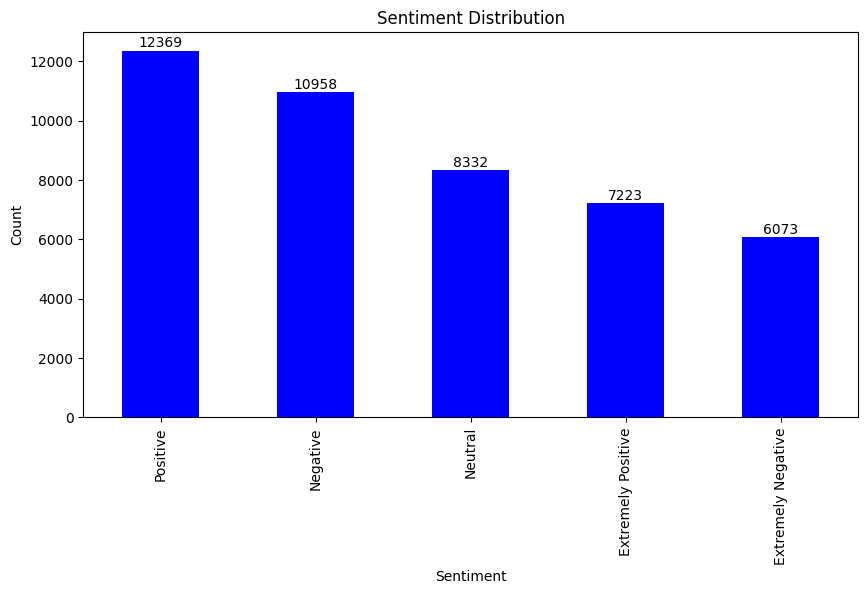

In [96]:
import matplotlib.pyplot as plt

data = df['Sentiment'].value_counts()

plt.plot()
data.plot(kind='bar', color='blue', figsize=(10, 5))
for i, v in enumerate(data):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')


## Preprocesowanie danych

In [97]:
lst = df['OriginalTweet'][:3].tolist()
for l in lst:
    print(f"{l}\n")

@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8

advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order

Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P



### Sprowadzenie tesktu do małych liter

In [98]:
print(f"== BEFORE LOWER ==\n{df['OriginalTweet'][:3]}\n")
df['ProcessedTweet'] = df['OriginalTweet'].str.lower()
print(f"== AFTER LOWER ==\n{df['ProcessedTweet'][:3]}\n")

== BEFORE LOWER ==
0    @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1    advice Talk to your neighbours family to excha...
2    Coronavirus Australia: Woolworths to give elde...
Name: OriginalTweet, dtype: object

== AFTER LOWER ==
0    @menyrbie @phil_gahan @chrisitv https://t.co/i...
1    advice talk to your neighbours family to excha...
2    coronavirus australia: woolworths to give elde...
Name: ProcessedTweet, dtype: object



### Usunięcie oznaczeń użytkowników oraz linków do stron internetowych

Zbiór danych zawiera tweety, które jak widzimy, zawierają linki oraz oznaczenia użytkowników (@uzytkownik1, @uzytkownik2). W tej sekcji usuniemy te oznaczenia oraz linki.

In [99]:
def remove_usernames_and_links(text):
    text = ' '.join([word for word in text.split() if not word.startswith('@')])
    text = ' '.join([word for word in text.split() if not word.startswith('http')])
    return text

In [100]:
print(f"== BEFORE USERNAMES AND LINKS ==\n{df['ProcessedTweet'][:3]}\n")
df['ProcessedTweet'] = df['ProcessedTweet'].apply(remove_usernames_and_links)
print(f"== AFTER USERNAMES AND LINKS ==\n{df['ProcessedTweet'][:3]}\n")

== BEFORE USERNAMES AND LINKS ==
0    @menyrbie @phil_gahan @chrisitv https://t.co/i...
1    advice talk to your neighbours family to excha...
2    coronavirus australia: woolworths to give elde...
Name: ProcessedTweet, dtype: object

== AFTER USERNAMES AND LINKS ==
0                                              and and
1    advice talk to your neighbours family to excha...
2    coronavirus australia: woolworths to give elde...
Name: ProcessedTweet, dtype: object



### Usunięcie słów stopu

In [101]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\olek2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [102]:
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))

In [103]:
print(f"== ENGLISH STOPWORDS ==\n{len(stop_words)}\n{stop_words[:10]}\n")

== ENGLISH STOPWORDS ==
198
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']



In [104]:
print(f"== BEFORE STOPWORDS ==\n{df['ProcessedTweet'][:3]}\n")
df['ProcessedTweet'] = df['ProcessedTweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
print(f"== AFTER STOPWORDS ==\n{df['ProcessedTweet'][:3]}\n")

== BEFORE STOPWORDS ==
0                                              and and
1    advice talk to your neighbours family to excha...
2    coronavirus australia: woolworths to give elde...
Name: ProcessedTweet, dtype: object

== AFTER STOPWORDS ==
0                                                     
1    advice talk neighbours family exchange phone n...
2    coronavirus australia: woolworths give elderly...
Name: ProcessedTweet, dtype: object



Widzimy, że pierwszy tekst został usunięty w całości stąd będzie trzeba sprawdzić jak wiele postów zostanie wyczyszczonych w ten sposób.

### Usunięcie znaków interpunkcyjnych

### Lematyzacja

### Stematyzacja

### Tokenizacja

### Normalizacja

## Modele ML